<a href="https://colab.research.google.com/github/Sergey-Kiselev-dev/ML_sem_pub/blob/main/ML_03_selfedu_tf_05e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator
import tensorflow as tf

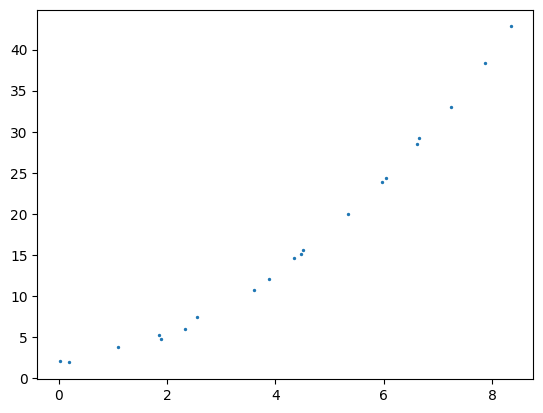

In [51]:
TOTAL_POINTS = 20

x = tf.random.uniform(shape=[TOTAL_POINTS], minval=0, maxval=10)
noise = tf.random.normal(shape=[TOTAL_POINTS], stddev=0.2)

a_true = 0.5
k_true = 0.7
b_true = 2.0

y = x * x* a_true + x * k_true + b_true + noise

plt.scatter(x, y, s=2)
plt.show()

In [52]:
a = tf.Variable(0.4)
k = tf.Variable(0.6)
b = tf.Variable(1.8)

f = a * x * x + k * x + b
loss = tf.reduce_mean(tf.square(y - f))

In [53]:
EPOCHS = 500
learning_rate = 0.0005

for n in range(EPOCHS):
  with tf.GradientTape() as t:
    f = a * x * x + k * x + b
    loss = tf.reduce_mean(tf.square(y - f))

  da, dk, db = t.gradient(loss, [a, k, b])

  a.assign_sub(learning_rate * da)
  k.assign_sub(learning_rate * dk)
  b.assign_sub(learning_rate * db)

print(a, k, b, sep="\n")

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5035581>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7039611>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.8572685>


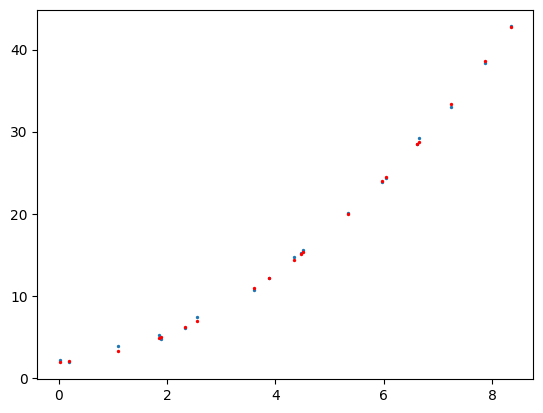

In [54]:
y_pr = a * x * x + k * x + b
plt.scatter(x, y, s = 2)
plt.scatter(x, y_pr, c = 'r', s = 2)

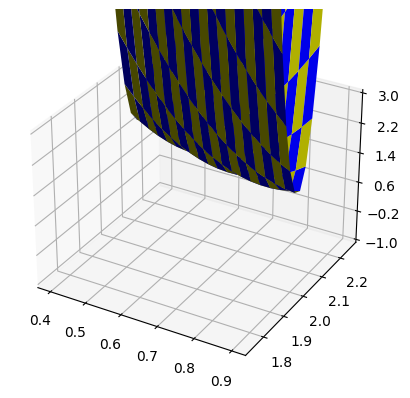

In [55]:
a = 0.5
dk = 0.025
db = 0.025
xplt = np.linspace(0.40, 0.90, TOTAL_POINTS)
yplt = np.linspace(1.75, 2.25, TOTAL_POINTS)
xplt, yplt = np.meshgrid(xplt, yplt)
zplt = np.zeros((TOTAL_POINTS, TOTAL_POINTS))
# print(zs)
for ix in range(TOTAL_POINTS):
  for iy in range(TOTAL_POINTS):
    k = dk * ix + 0.40
    b = db * iy + 1.75
    z = 0.0
    for j in range(TOTAL_POINTS):
      z += (y[j] - a * x[j] * x[j] - k * x[j] - b) ** 2
    zplt[ix][iy] = z
# print(zplt)
# Create an empty array of strings with the same shape as the meshgrid, and
# populate it with two colors in a checkerboard pattern.
colortuple = ('y', 'b')
colors = np.empty(xplt.shape, dtype=str)
for iy in range(len(yplt)):
    for ix in range(len(xplt)):
        colors[iy, ix] = colortuple[(ix + iy) % len(colortuple)]

ax = plt.figure().add_subplot(projection='3d')
# Plot the surface with face colors taken from the array we made.
surf = ax.plot_surface(xplt, yplt, zplt, facecolors=colors, linewidth=0)
# Customize the z axis.
ax.set_zlim(-1, 3)
ax.zaxis.set_major_locator(LinearLocator(6))
# for j in range(TOTAL_POINTS):
#   plt.plot(xplt, zs[j])
plt.show()